### Read csv, use NLTK

In [1]:
# dependencies
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Read data into dataframe
file = os.path.join('..', 'Raw Data', 'train.csv' )
tweet_df = pd.read_csv(file, encoding='latin-1')
tweet_df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
# Check tweet length
tweet_df['pre_clean_len'] = [len(t) for t in tweet_df.SentimentText]
tweet_df.head()

,ItemID,Sentiment,SentimentText,pre_clean_len
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53


In [4]:
# Preprocessing
import string 

# remove numbers
tweet_df['pre_clean_txt'] = [t.translate(str.maketrans('', '', string.digits)) for t in tweet_df.SentimentText]

In [5]:
# NLTK 
# to get dictionary run:
# >>> import nltk
# >>> nltk.download('words')
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.corpus import words as nltk_words
from nltk.stem.porter import PorterStemmer

stop_words = stopwords.words('english')

# words into dictionary for fast lookup
engl_words = dict.fromkeys(nltk_words.words(), None)

#initializes porter
porter = PorterStemmer()

# use strip handle (tweeter) and reduce lenght (haaalooooo -> haaloo)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

def get_tokens(text):
    # text to tokens
    tokens = tknzr.tokenize(text)
    # remove punctuations, words to lower case
    alpha_tokens = [w.lower() for w in tokens if w.isalpha()]
    # do not use stop words
    ns_tokens = [w for w in alpha_tokens if not w in stop_words]
    # stemming
    st_tokens = [porter.stem(t) for t in ns_tokens]
    # only words in dictionary
    return [w for w in st_tokens if w in engl_words]
    
tweet_df['Tokenized'] = [get_tokens(t) for t in tweet_df.pre_clean_txt]
tweet_df.head()

,ItemID,Sentiment,SentimentText,pre_clean_len,pre_clean_txt,Tokenized
0,1,0,is so sad for my APL frie...,61,is so sad for my APL frie...,"[sad, friend]"
1,2,0,I missed the New Moon trail...,51,I missed the New Moon trail...,"[miss, new, moon, trailer]"
2,3,1,omg its already 7:30 :O,37,omg its already : :O,[]
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132,.. Omgaga. Im sooo im gunna CRy. I'...,"[dentist, get, crown, put, min]"
4,5,0,i think mi bf is cheating on me!!! ...,53,i think mi bf is cheating on me!!! ...,"[think, mi, cheat]"


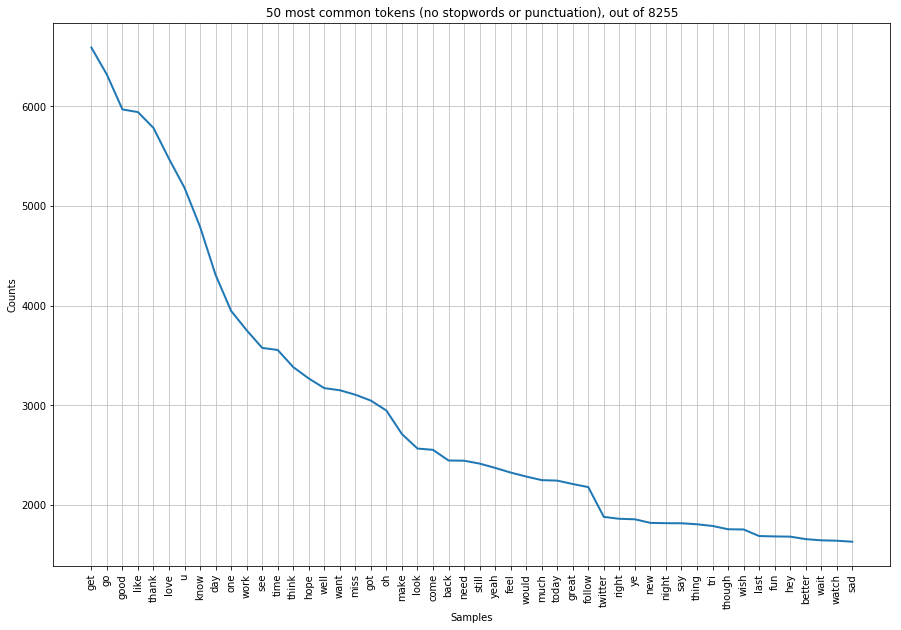

In [7]:
# https://vprusso.github.io/blog/2018/natural-language-processing-python-1/
# https://wordnet.princeton.edu/
# Words stat
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))

from nltk.probability import FreqDist

tokens_list =  [w for sublist in tweet_df.Tokenized for w in sublist]
tokens_list

fdist = nltk.FreqDist(tokens_list)
fdist.plot(50, cumulative=False, title=f"50 most common tokens (no stopwords or punctuation), out of {len(fdist.keys())}")


In [12]:
# Tweets to file
file = os.path.join('..', 'Output', 'tweets1.csv' )
out_df = tweet_df.loc[:, ['ItemID', 'Sentiment', 'Tokenized']]
out_df['Tokenized'] = out_df.Tokenized.apply(' '.join)
out_df.to_csv(file, index=False)

# Words to file
words_df = pd.DataFrame.from_dict(fdist.items())
words_df.columns = ['word','count']
words_df.sort_values(by=['word'], inplace=True)
words_df = words_df.reset_index(drop=True)
file = os.path.join('..', 'Output', 'words1.csv' )
words_df.to_csv(file)
words_df.head()

,word,count
0,aa,10
1,aam,1
2,aback,1
3,abandon,15
4,abb,2


In [13]:
# A bit of fun with visualization


wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict([t for t in fdist.items()]))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


NameError: name 'WordCloud' is not defined

In [ ]:
# test tokenizers
test_txt = '@AnnOhio Hi Ann!!!!  *HUGE HUGS from FL*'
print(tknzr.tokenize(test_txt))
print(get_tokens(test_txt))
